In [1]:
import os
import datetime

import icepacktools as ipt

In [2]:
# Load history output
ip_dirs_path = "/root/icepack-dirs"
run_dict = {#"base": None,
            "hocn_issue": None,
            "test_sealvl_nochange": None,
            "test_sealvl": None,
            "test_sealvl_tscale": None,
            "test_sealvl_apnd": None,
            "test_sealvl_congel": None,
            }
trcr_dict = {17: 'alvl',
             18: 'vlvl',
             19: 'apnd',
             20: 'hpnd',
             21: 'ipnd',
             }
trcrn_dict = {17: 'alvln',
              18: 'vlvln',
              19: 'apndn',
              20: 'hpndn',
              21: 'ipndn',
              }

hist_dict = {}
for key, value in run_dict.items():
    hist_dict[key] = ipt.load_icepack_hist(run_name=key, 
                                           icepack_dirs_path=ip_dirs_path, 
                                           hist_filename=value,
                                           compute_albedo_ai=True,
                                           volp=True,
                                           pnd_budget=True,
                                           trcr_dict=trcr_dict,
                                           trcrn_dict=trcrn_dict)

/root/code/icepack_postprocessing/icepacktools.py:118: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = ds.indexes['time'].to_datetimeindex()
/root/code/icepack_postprocessing/icepacktools.py:118: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  datetimeindex = ds.indexes['time'].to_datetimeindex()
/root/code/icepack_postprocessing/icepacktools.py:118: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operat

In [28]:
# Check that the modified outputs match hocn issue
comp = "test_sealvl_nochange"
# Check whether or not dataarrays are identical
for ni in [1, 2, 3, 4]:
    print(ni)
    for key, da in hist_dict["hocn_issue"].sel(ni=ni).data_vars.items():
        if not da.equals(hist_dict[comp].sel(ni=ni)[key]):
            print(key)
            print('max diff: ' + str((hist_dict[comp].sel(ni=ni)[key] - da).max().values))
            print('min diff: ' + str((hist_dict[comp].sel(ni=ni)[key] - da).min().values))
print("Above are data arrays that do not match.")


1
flpnd
max diff: 6.1257422745431e-18
min diff: -5.800481622797449e-18
expnd
max diff: 6.071532165918825e-18
min diff: -5.4752209710517974e-18
flpndn
max diff: 9.18861341181465e-18
min diff: -8.917562868693274e-18
expndn
max diff: 8.72782748850831e-18
min diff: -8.998878031629687e-18
liq_out
max diff: 1.0625181290357943e-17
min diff: -6.938893903907228e-18
liq_diff
max diff: 6.938893903907228e-18
min diff: -1.0625181290357943e-17
frshwtr_residual
max diff: 6.505213034913027e-19
min diff: -2.949029909160572e-16
2
flpnd
max diff: 1.3173056395698879e-17
min diff: -1.2522535092207576e-17
expnd
max diff: 1.431146867680866e-17
min diff: -1.3444106938820255e-17
flpndn
max diff: 2.5614276324970042e-17
min diff: -2.6020852139652106e-17
expndn
max diff: 2.6020852139652106e-17
min diff: -2.45029690981724e-17
liq_out
max diff: 2.2985086056692694e-17
min diff: -2.1467203015212988e-17
liq_diff
max diff: 2.1467203015212988e-17
min diff: -2.2985086056692694e-17
frshwtr_residual
max diff: 2.91433543964

Therefore, test_sealvl_nochange produces the same output as hocn_issue. hocn_issue output is slightly different from 'base' (Consortium main) but that's because of an error in how hocn is calculated and should be fixed in general.

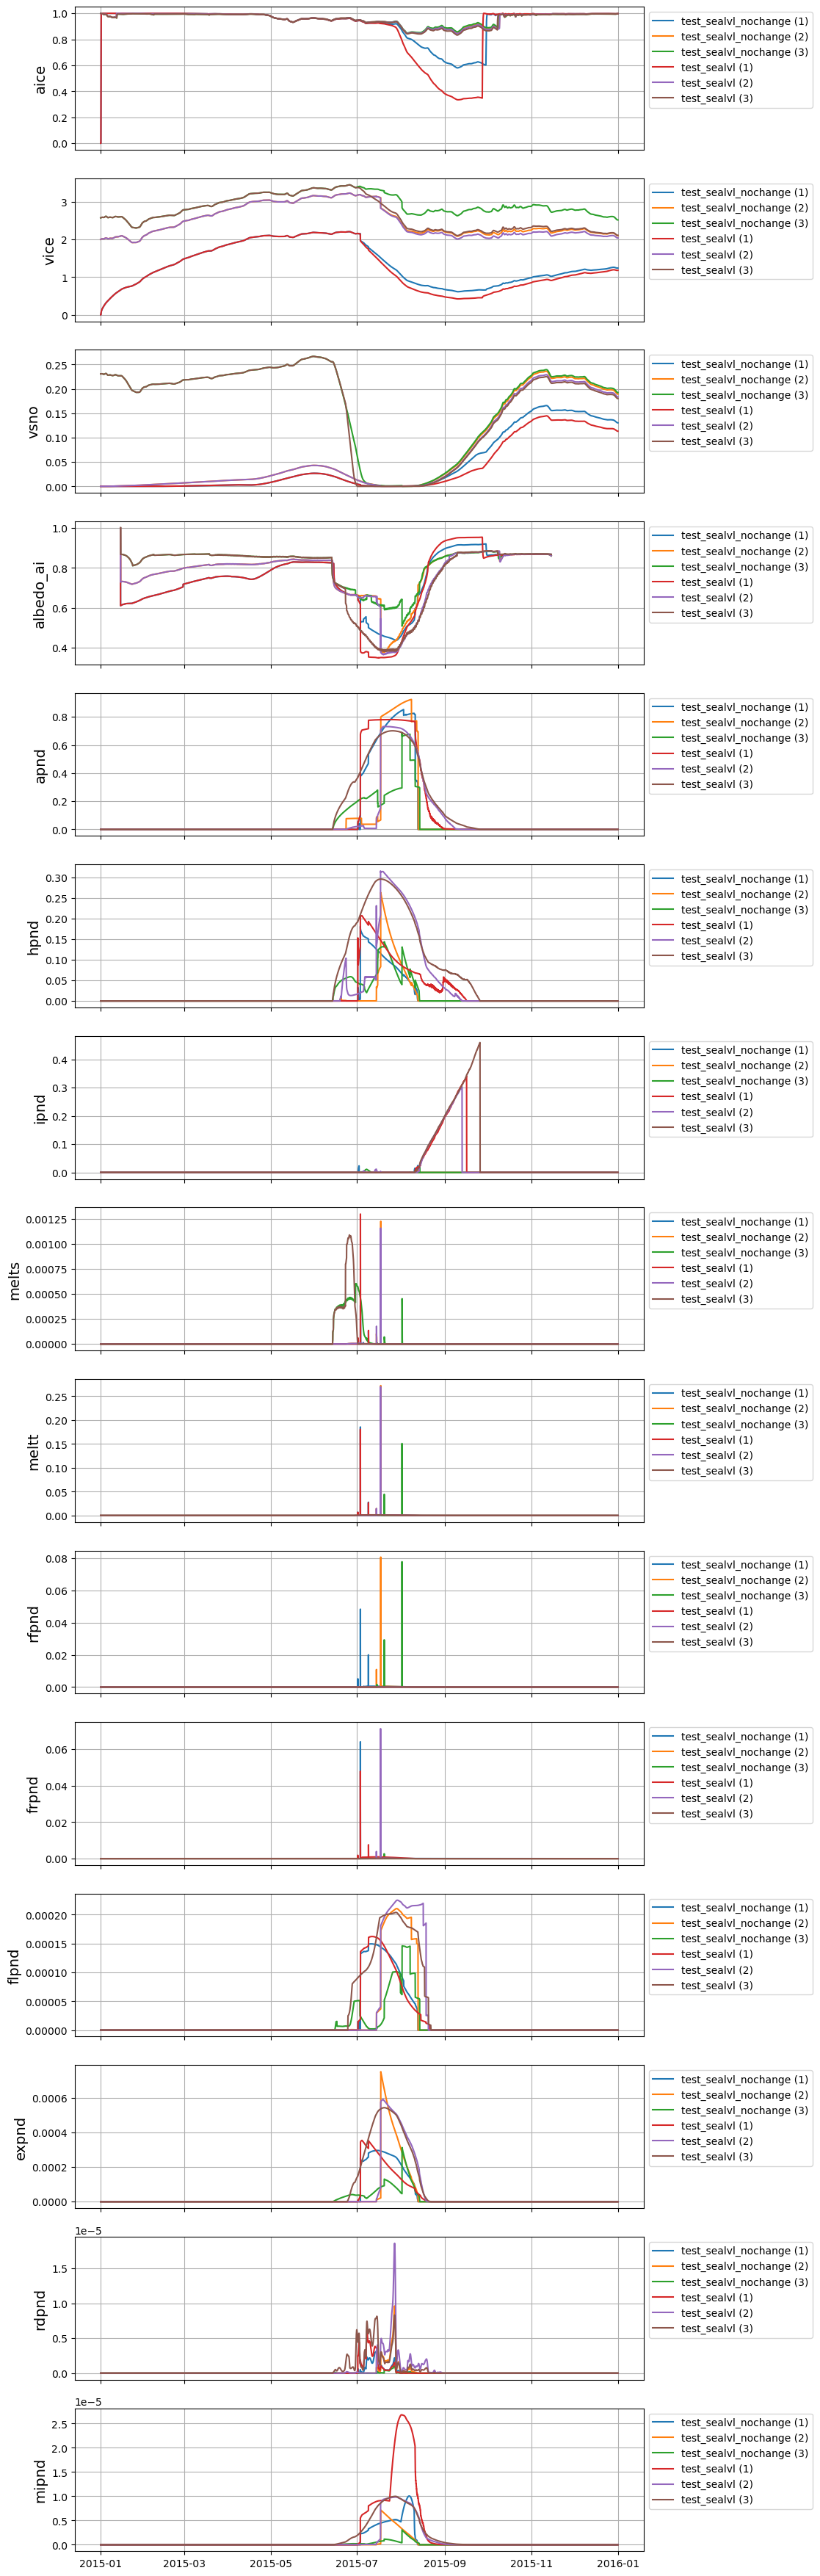

In [29]:
# Plot comparison with no
run_plot_dict = {"test_sealvl_nochange": [1, 2, 3],
                 "test_sealvl": [1, 2, 3],
                 }
var_names = ['aice', 'vice', 'vsno', 'albedo_ai', 'apnd', 'hpnd', 'ipnd', 'melts', 'meltt', 'rfpnd', 'frpnd', 'flpnd', 'expnd', 'rdpnd', 'mipnd']
xlim = [datetime.datetime.fromisoformat('2015-06-01'),
                  datetime.datetime.fromisoformat('2015-09-01')]

f, axs = ipt.plot_handler(run_plot_dict, var_names, hist_dict)#, xlim=xlim, resample='D')

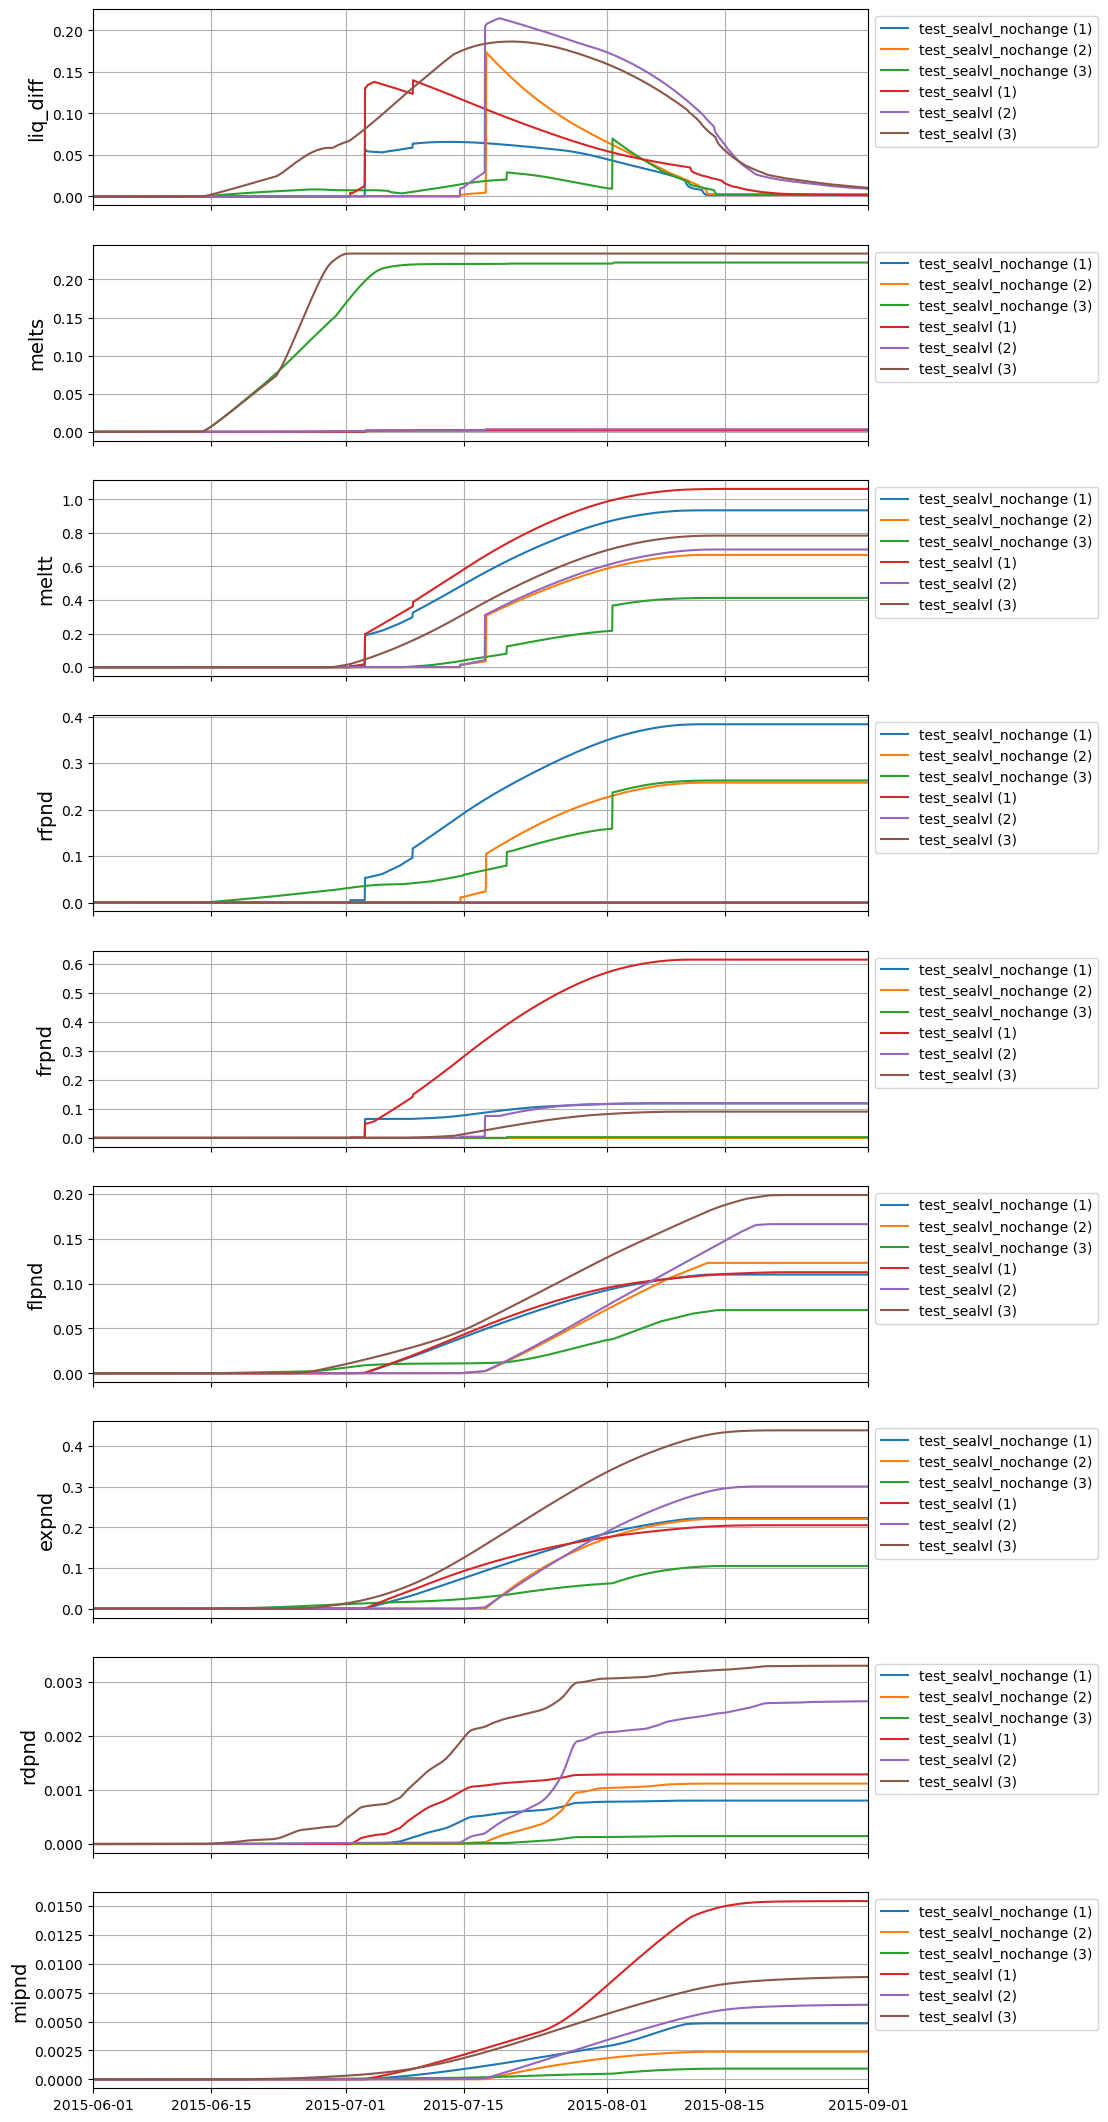

In [30]:
# Plot comparison with no
run_plot_dict = {"test_sealvl_nochange": [1, 2, 3],
                 "test_sealvl": [1, 2, 3],
                 }
var_names = ['liq_diff', 'melts', 'meltt', 'rfpnd', 'frpnd', 'flpnd', 'expnd', 'rdpnd', 'mipnd']
xlim = [datetime.datetime.fromisoformat('2015-06-01'),
                  datetime.datetime.fromisoformat('2015-09-01')]

f, axs = ipt.plot_handler(run_plot_dict, var_names, hist_dict, cumulative=True, xlim=xlim)

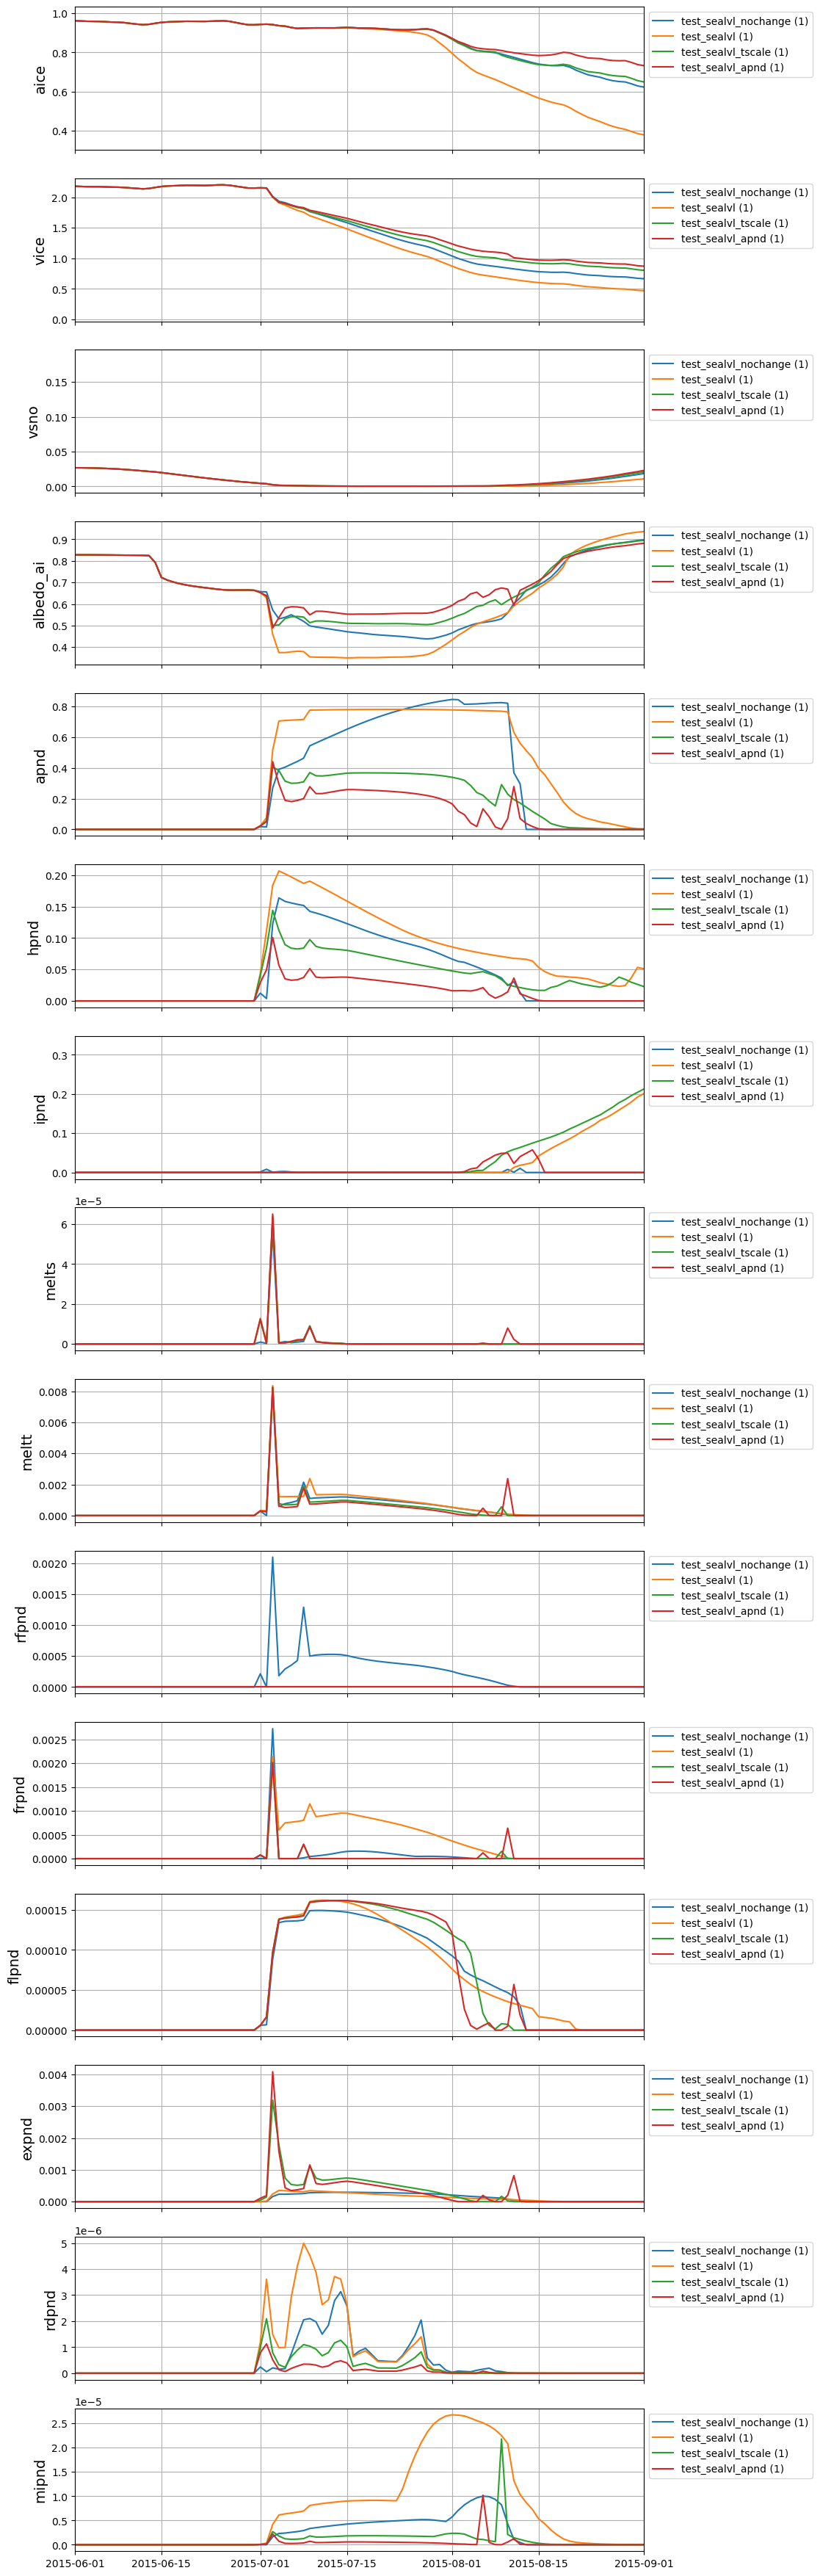

In [31]:
# Plot comparison 
run_plot_dict = {"test_sealvl_nochange": [1],
                 "test_sealvl": [1],
                 "test_sealvl_tscale": [1],
                 "test_sealvl_apnd": [1],
                 }
var_names = ['aice', 'vice', 'vsno', 'albedo_ai', 'apnd', 'hpnd', 'ipnd', 'melts', 'meltt', 'rfpnd', 'frpnd', 'flpnd', 'expnd', 'rdpnd', 'mipnd']
xlim = [datetime.datetime.fromisoformat('2015-06-01'),
                  datetime.datetime.fromisoformat('2015-09-01')]

f, axs = ipt.plot_handler(run_plot_dict, var_names, hist_dict, xlim=xlim, resample='D')

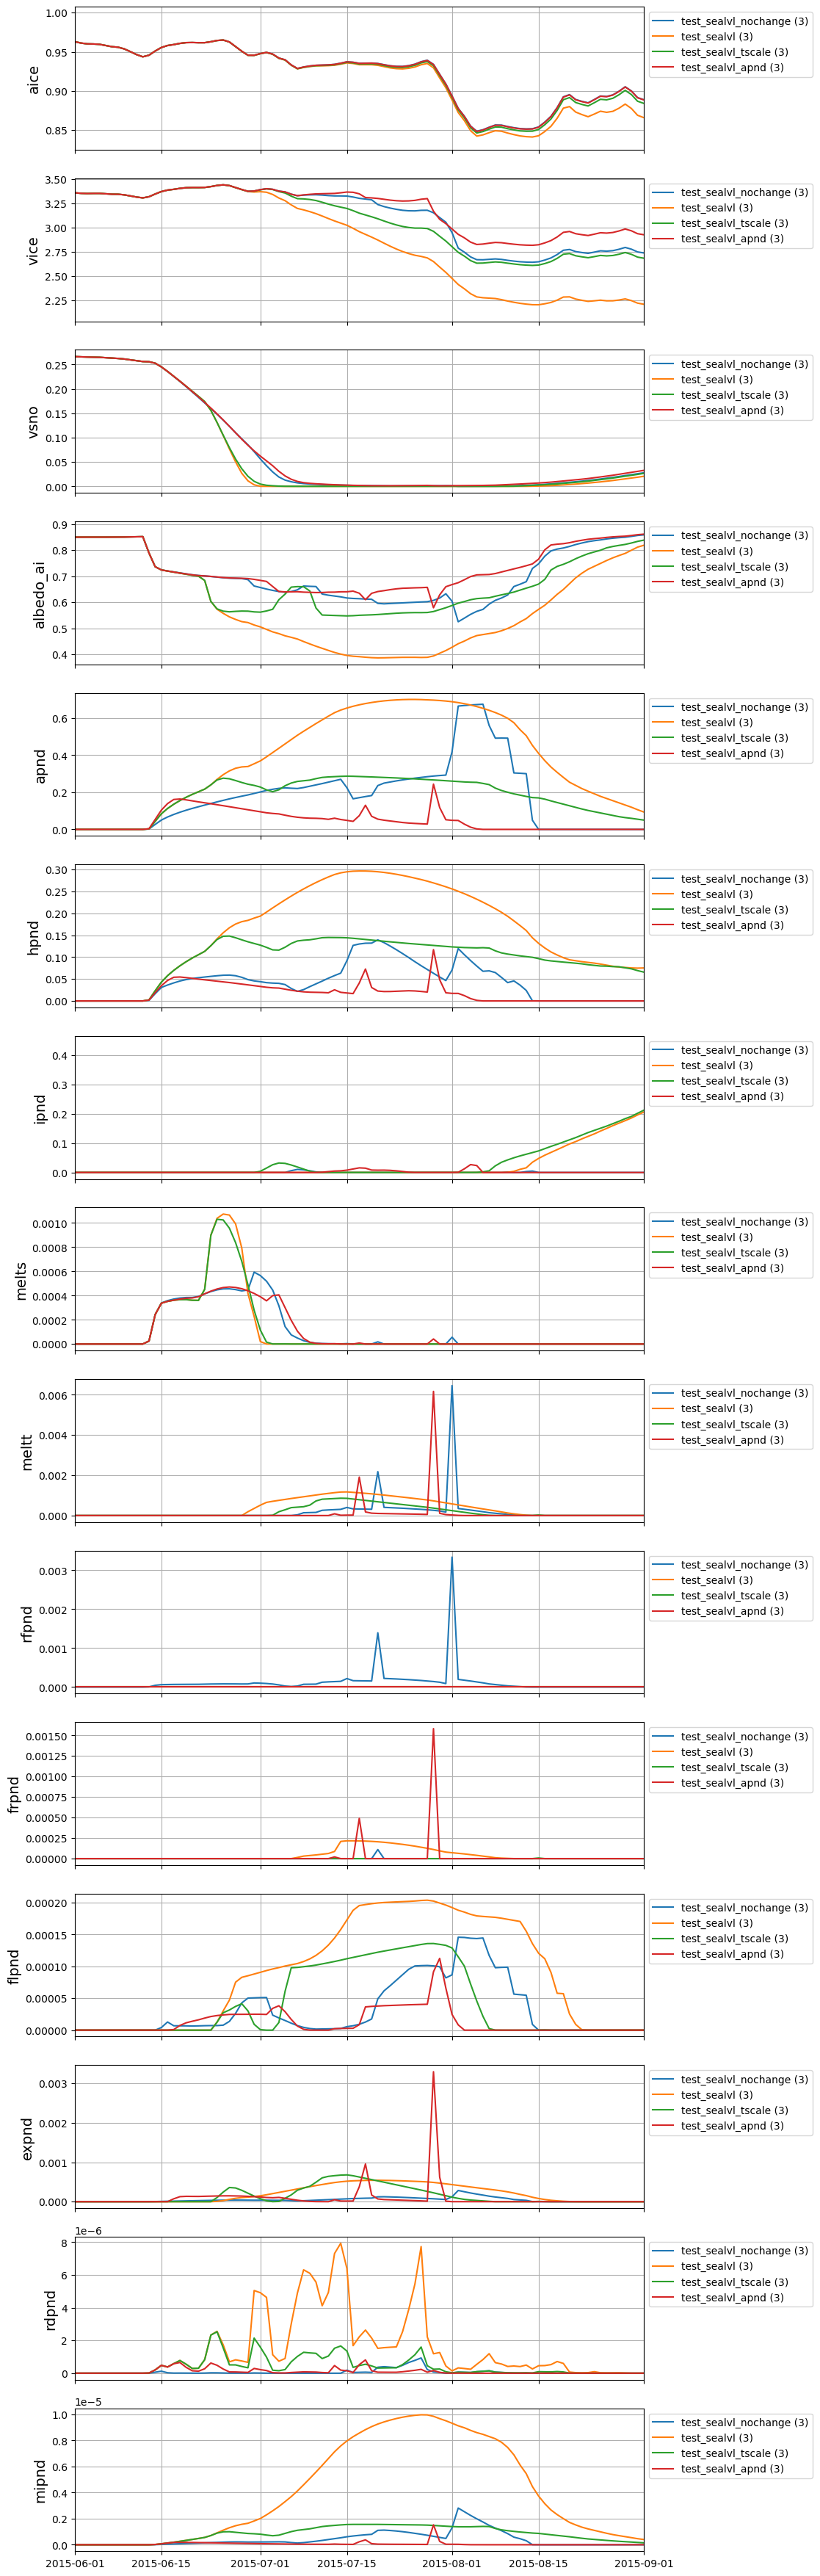

In [32]:
# Plot comparison 
run_plot_dict = {"test_sealvl_nochange": [3],
                 "test_sealvl": [3],
                 "test_sealvl_tscale": [3],
                 "test_sealvl_apnd": [3],
                 }
var_names = ['aice', 'vice', 'vsno', 'albedo_ai', 'apnd', 'hpnd', 'ipnd', 'melts', 'meltt', 'rfpnd', 'frpnd', 'flpnd', 'expnd', 'rdpnd', 'mipnd']
xlim = [datetime.datetime.fromisoformat('2015-06-01'),
                  datetime.datetime.fromisoformat('2015-09-01')]

f, axs = ipt.plot_handler(run_plot_dict, var_names, hist_dict, xlim=xlim, resample='D')

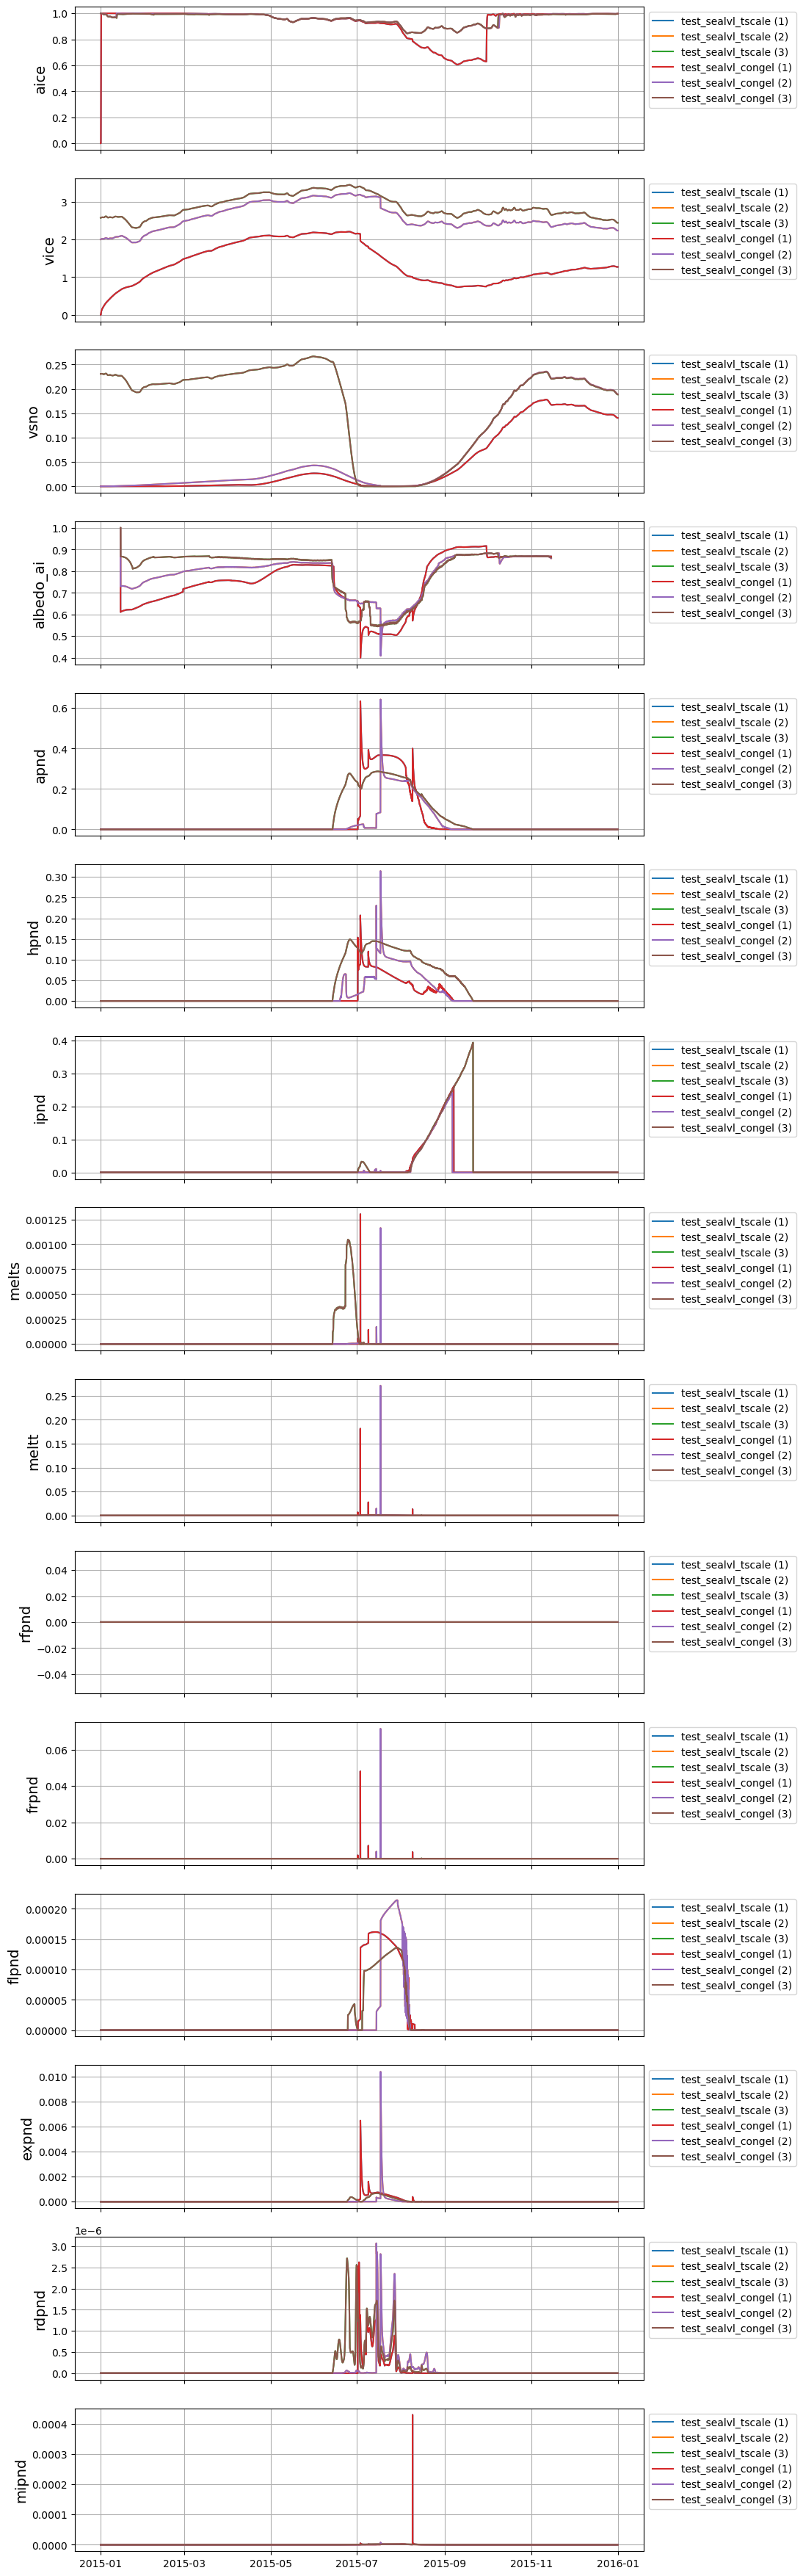

In [3]:
# Plot comparison with before and after merging in the congelation growth fix
run_plot_dict = {"test_sealvl_tscale": [1, 2, 3],
                 "test_sealvl_congel": [1, 2, 3],
                 }
var_names = ['aice', 'vice', 'vsno', 'albedo_ai', 'apnd', 'hpnd', 'ipnd', 'melts', 'meltt', 'rfpnd', 'frpnd', 'flpnd', 'expnd', 'rdpnd', 'mipnd']
xlim = [datetime.datetime.fromisoformat('2015-06-01'),
                  datetime.datetime.fromisoformat('2015-09-01')]

f, axs = ipt.plot_handler(run_plot_dict, var_names, hist_dict)#, xlim=xlim, resample='D')